In [1]:
import ai_lec2
import gensim
import sklearn.cluster
import numpy as np
import matplotlib.pyplot as plt
import seaborn

We cna first load the data, uncomment out the one you want

In [2]:
df = ai_lec2.loadNatregimes()
#df = ai_lec2.loadSenateLarge()
#df = ai_lec2.loadSenateSmall()
#df = ai_lec2.loadNewsGroups()


loading data
Converting to vectors


We then select a clustering alorithim, the complete list is [here](http://scikit-learn.org/stable/modules/clustering.html). The one we are using is very general and tends to work OK for most data, if you get the number of clusters correct.

In [17]:
numCategories = len(set(df['category']))
clf = sklearn.cluster.KMeans(n_clusters=numCategories, init='k-means++')
clf.fit(np.stack(df['vect'], axis=1)[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

We can get a few stats about how well the technique worked, look [here](http://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation) for more discusion.

In [5]:
ai_lec2.clusteringMetrics(clf, df)

Homogeneity: 0.104
Completeness: 0.412
V-measure: 0.167


We can also project the data into 2 dimensions and plot it, there are a few issues with this though:

1. The projection loses most of the information, just because things look far apart once projected, doens't mean they are in the original space
2. The cluster dection algorthims don't give names to the clusters so linking know clusters to the model's clusters can be tricky

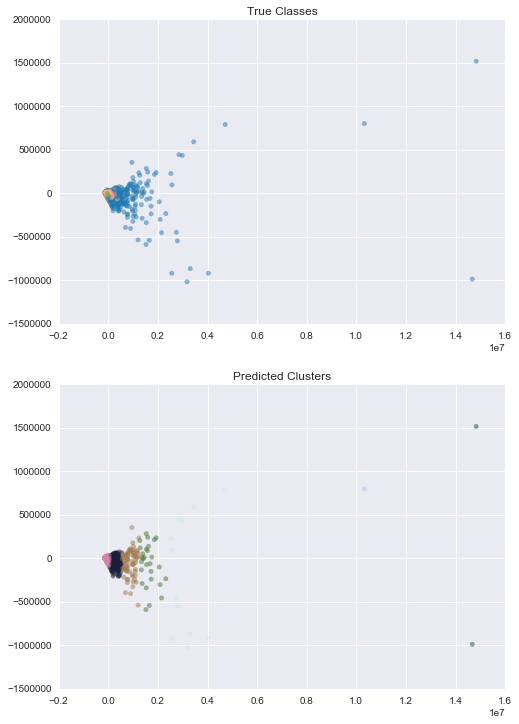

In [6]:
ai_lec2.visulizeClusters(clf, df)

If we want to do word2vec we have to use either the senate data, or the pre trained NYT data.

In [7]:
df = ai_lec2.loadSenateLarge()

Loading senator: Kennedy
Loading senator: Kerry
Loading senator: Klobuchar
Loading senator: Kohl
Loading senator: Kyl
Converting to vectors


You can load the NYT data by uncommenting the secodn line

In [9]:
w2v = gensim.models.word2vec.Word2Vec(df['normalized_sents'].sum())
#w2v = loadNYTmodel()

We can plot the data in projected space, but the same issues exists as  with the clusters around projections

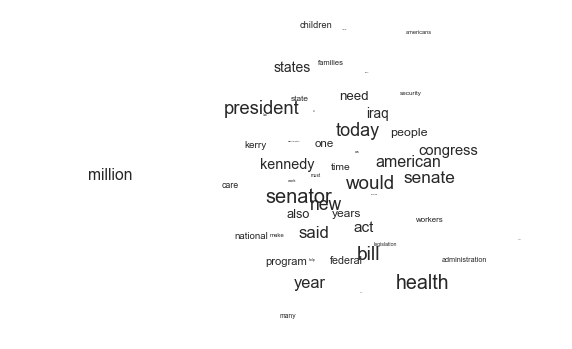

In [18]:
ai_lec2.plotWord2Vec(w2v)